#Lista 1: Um pouco mais sobre CDFs, BoxPlots, histogramas...

## Forma de entrega

Salve essa página (com código e respostas geradas) em ``.pdf`` e submeta o documento na atividade do AVA (apenas um integrante do grupo deve fazer a submissão).

## Grupos

* **Graduação:** grupo de até 3 pessoas
* **Pós-Graduação:** individual

## Integrantes do grupo

1. **Nome(s):**
Artur Mendes de Moraes, Gianluca Schmidt Mantovaneli, Renan Campista

2. **Matrícula(s):**
2020100708, 2024203034, 2022200751

3. **E-mail(s) institucional(is):**
artur.moraes@edu.ufes.br, gianluca.mantovaneli@edu.ufes.br, renan.campista@edu.ufes.br

3. **Curso(s):**
Ciência da computação, Ciência da computação, Ciência da computação

4. **Link do seu Colab com suas soluções (para que o professor possa acessar e rodar o código):**
https://colab.research.google.com/drive/1vrvMYqv9mj0dBKyuy54qQpZWCr32KLOp?usp=sharing

## Sobre a Avaliação

Todas questões têm o mesmo peso/valor.

## Questão 1

O objetivo desta questão é comparar as **Funções de Distribuição** (i.e., CDF) teórica e empírica de algumas distribuições contínuas bem conhecidas.

Lembre-se que nós conversamos um pouco sobre CDFs na Aula 3.

### Exemplo

Vamos começar com um exemplo sobre a distribuição Uniforme contínua.

A biblioteca ``scipy`` possui funcionalidades para gerar números pseudo-aleatórios e para computar valores da CDF teórica da distribuição. Leia mais sobre em https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html.

A biblioteca ``statsmodels`` possui funcionalidades para computar a CDF empírica de um conjunto de observações.

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
def plot_uniform_cdf(loc, scale, n):
  # gera 'n' números de uma distribuição uniforme contínua no
  # intervalo [loc, loc + scale]
  r = uniform.rvs(loc = loc, scale = scale, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
  # [loc, loc + scale]
  plt.plot(cdf.x, uniform.cdf(cdf.x, loc = loc, scale = scale),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

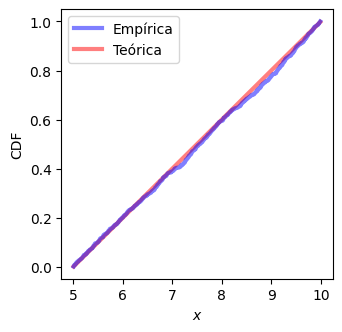

In [ ]:
plot_uniform_cdf(5, 5, 1000)

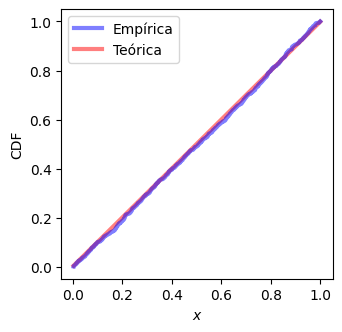

In [ ]:
plot_uniform_cdf(0, 1, 1000)

### Parte (*a*)

Repita a análise acima para a distribuição normal. Lembre-se que a distribuição normal possui dois parâmetros: $\mu$ e $\sigma$.

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição normal.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição normal;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
def plot_normal_cdf(mu, sigma, n):
    r = norm.rvs(
        loc=mu,
        scale=sigma,
        size=n
    )

    cdf = ECDF(r)
    plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
            label = 'Empírica')

    plt.plot(cdf.x, norm.cdf(cdf.x, loc = mu, scale = sigma),
            alpha = 0.5, label = 'Teórica', color = 'red',
            linewidth = 3, zorder = 0)

    # Ajustes de rótulos e tamanho da figura...
    plt.legend(loc = 'best')
    plt.xlabel(r'$x$')
    plt.ylabel(r'CDF')
    plt.gcf().set_size_inches(3.5, 3.5)

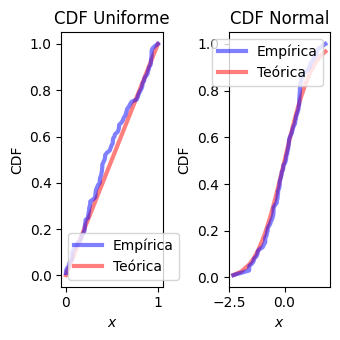

In [ ]:
# Cria uma figura com dois gráficos para comparar a CDF empírica com a CDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_uniform_cdf(0, 1, 100)
plt.title('CDF Uniforme')

plt.subplot(1, 2, 2)
plot_normal_cdf(0, 1, 100)
plt.title('CDF Normal')

# Ajustar automaticamente os espaçamentos
plt.tight_layout()
plt.show()


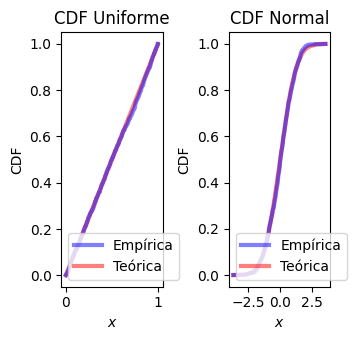

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_uniform_cdf(0, 1, 1000)
plt.title('CDF Uniforme')

plt.subplot(1, 2, 2)
plot_normal_cdf(0, 1, 1000)
plt.title('CDF Normal')

plt.tight_layout()
plt.show()


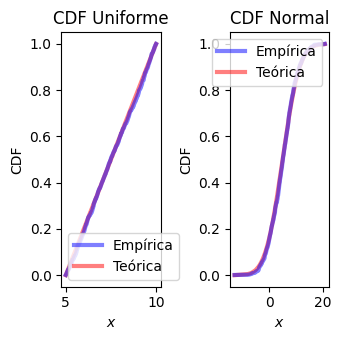

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_uniform_cdf(5, 5, 1000)
plt.title('CDF Uniforme')

plt.subplot(1, 2, 2)
plot_normal_cdf(5, 5, 1000)
plt.title('CDF Normal')

# Ajustar automaticamente os espaçamentos
plt.tight_layout()
plt.show()

### Parte (*b*)

Repita a análise inicial para a distribuição exponencial. Lembre-se, dado um parâmetro $\lambda > 0$, a densidade da distribuição exponencial é:
$$f(x) = \lambda e^{-\lambda x}\text{, } x > 0.$$

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição exponencial.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição exponencial;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

**ATENÇÃO:** Leia com atenção a documentação da biblioteca mencionada para entender como o parâmetro $\lambda$ deve ser fornecido. O $\lambda$ da definição acima não é o mesmo que o `scale` da biblioteca.

In [ ]:
from scipy.stats import expon

In [ ]:
def plot_exponential_cdf(lambda_, n):
    r = expon.rvs(
        scale=1/lambda_,
        size=n
    )

    cdf = ECDF(r)
    plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
            label = 'Empírica')

    plt.plot(cdf.x, expon.cdf(cdf.x, scale=1/lambda_),
            alpha = 0.5, label = 'Teórica', color = 'red',
            linewidth = 3, zorder = 0)

    plt.legend(loc = 'best')
    plt.xlabel(r'$x$')
    plt.ylabel(r'CDF')
    plt.gcf().set_size_inches(3.5, 3.5)

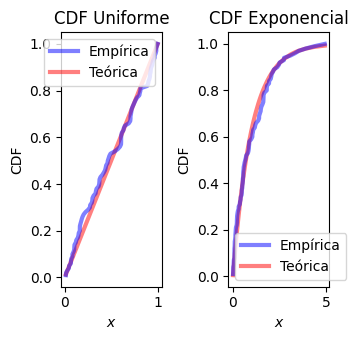

In [ ]:
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plot_uniform_cdf(0, 1, 100)
  plt.title('CDF Uniforme')

  plt.subplot(1, 2, 2)
  plot_exponential_cdf(1, 100)
  plt.title('CDF Exponencial')

  plt.tight_layout()
  plt.show()

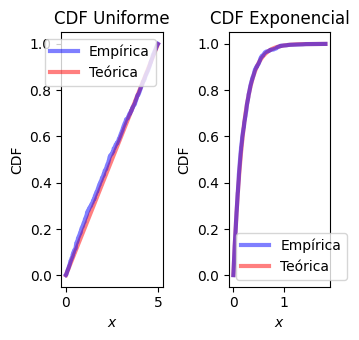

In [ ]:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plot_uniform_cdf(0, 5, 1000)
    plt.title('CDF Uniforme')

    plt.subplot(1, 2, 2)
    plot_exponential_cdf(5, 1000)
    plt.title('CDF Exponencial')

    plt.tight_layout()
    plt.show()


### Parte (*c*)

Agora as coisas ficam mais interessantes...

Repita a análise inicial para a distribuição de pareto. Lembre-se, dado um parâmetro $b > 0$, a densidade da distribuição de pareto é:
$$f(x) = \frac{b}{x^{b+1}}\text{, } x \ge 1.$$

Consulte https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_pareto.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição de pareto.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição de pareto;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [ ]:
from scipy.stats import pareto

In [ ]:
def plot_pareto_cdf(b, n):
    r = pareto.rvs(b, size=n)

    cdf = ECDF(r)
    plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
            label = 'Empírica')

    plt.plot(cdf.x, pareto.cdf(cdf.x, b),
            alpha = 0.5, label = 'Teórica', color = 'red',
            linewidth = 3, zorder = 0)

    plt.legend(loc = 'best')
    plt.xlabel(r'$x$')
    plt.ylabel(r'CDF')
    plt.gcf().set_size_inches(3.5, 3.5)

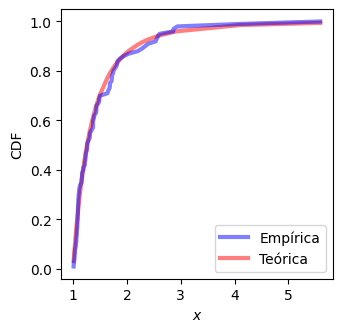

In [ ]:
plot_pareto_cdf(3, 100)

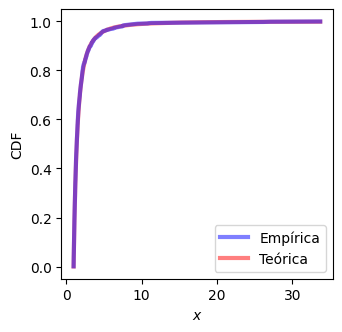

In [ ]:
plot_pareto_cdf(2, 1000)

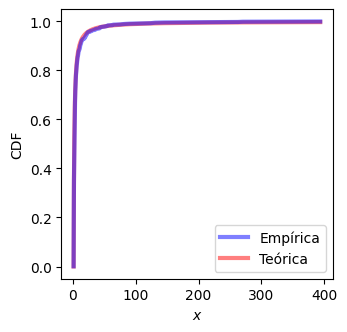

In [ ]:
plot_pareto_cdf(1, 1000)

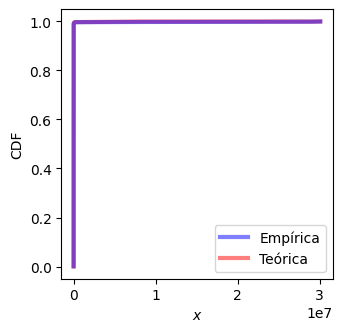

In [ ]:
plot_pareto_cdf(0.5, 1000)

Após fazer as figuras, você provavelmente observou que para valores pequenos de $b$, a CDF da distribuição de pareto é bastante difícil de ler, uma vez que fica praticamente "colada" às retas $x = 0$ e $y = 1$.

Esse fenômeno ocorre porque, quando $b$ é pequeno, valores muito grandes (i.e., discrepantes ou *outliers*) têm uma probabilidade não negligível de ocorrerem.

Quando observamos o comportamento das figuras acima, devemos modificar a forma de visualizar a distribuição:
1. Devemos gerar uma figura para a CCDF (*Complementary Cumulative Distribution Function*). A CCDF de um valor $x$ é definida como 1 menos a CDF de $x$.
2. Devemos colocar os eixos $x$ e $y$ em escala logarítmica.

Complete a função abaixo para gerar a figura da forma descrita acima e gere os gráficos para os mesmos casos que testou anteriormente.

In [ ]:
def plot_pareto_ccdf(b, n):
    r = pareto.rvs(b, size=n)

    cdf = ECDF(r)
    ccdf_empirical = 1 - cdf.y
    ccdf_theoretical = 1 - pareto.cdf(cdf.x, b)

    plt.plot(cdf.x, ccdf_empirical, linewidth=3, alpha=0.5, color='blue',
                label='Empírica')

    plt.plot(cdf.x, ccdf_theoretical,
                alpha=0.5, label='Teórica', color='red',
                linewidth=3, zorder=0)

    plt.legend(loc='best')
    plt.xlabel(r'$x$')
    plt.ylabel(r'CCDF')
    plt.xscale('log')
    plt.yscale('log')
    plt.gcf().set_size_inches(4.5, 4.5)

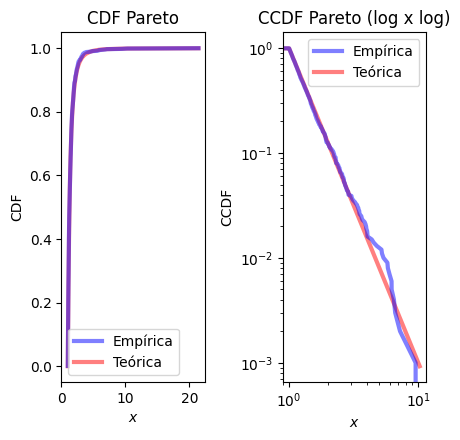

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_pareto_cdf(3, 1000)
plt.title('CDF Pareto')

plt.subplot(1, 2, 2)
plot_pareto_ccdf(3, 1000)
plt.title('CCDF Pareto (log x log)')

plt.tight_layout()
plt.show()

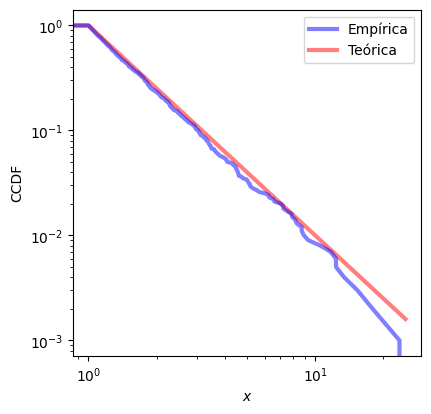

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_pareto_cdf(2, 1000)
plt.title('CDF Pareto')

plt.subplot(1, 2, 2)
plot_pareto_ccdf(2, 1000)
plt.title('CCDF Pareto (log x log)')

plt.tight_layout()
plt.show()


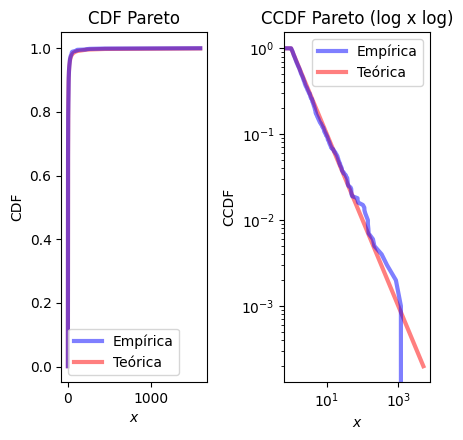

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_pareto_cdf(1, 1000)
plt.title('CDF Pareto')

plt.subplot(1, 2, 2)
plot_pareto_ccdf(1, 1000)
plt.title('CCDF Pareto (log x log)')

plt.tight_layout()
plt.show()

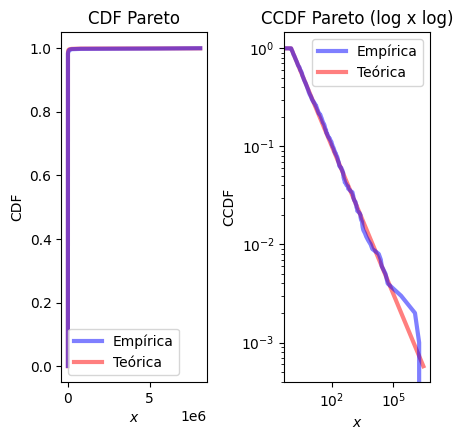

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_pareto_cdf(0.5, 1000)
plt.title('CDF Pareto')

plt.subplot(1, 2, 2)
plot_pareto_ccdf(0.5, 1000)
plt.title('CCDF Pareto (log x log)')

plt.tight_layout()
plt.show()

## Questão 2

Esta questão é **obrigatória** apenas para alunos da **pós-graduação**.

O objetivo desta questão é entender o comportamento da **parte (*c*)** da questão anterior.

Você deve ler as duas primeiras seções do artigo https://arxiv.org/pdf/cond-mat/0412004.pdf e fazer um resumo (de no máximo uma página). Certifique-se de incluir no seu resumo, entre outras informações que achar relevantes, o motivo de a CCDF da distribuição de pareto ter a forma que tem quando ambos os eixos estão em escala logarítmica.

## Questão 3

Primeiro, você deve ler os artigos abaixo.
1. [Common pitfalls in statistical analysis: The use of correlation techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/)
2. [Chocolate Consumption, Cognitive Function,
and Nobel Laureates](https://www.biostat.jhsph.edu/courses/bio621/misc/Chocolate%20consumption%20cognitive%20function%20and%20nobel%20laurates%20(NEJM).pdf)

Resumindo o que foi lido nos artigos, responda as seguintes questões:

1. O que é o coeficiente de correlação?
2. Quando o coeficiente de correlação é útil e quando ele pode ser a ferramenta errada para analisar a relação entre duas variáveis?
3. Qual a diferença entre causalidade e correlação?

**Observação 1:** é esperado que a resposta das três perguntas utilize aproximadamente duas páginas A4.

**Observação 2:** você pode consultar outras fontes para responder as questões acima. No entanto, é esperado que as respostas sejam no contexto do conteúdo dos artigos.

##Respostas
1: Esse coeficiente é um número de -1.00 à 1.00 que indica o quão relacionados estão as variáveis. Se o número for positivo significa que quando X aumenta Y aumenta junto. Se negativo significa que quando X diminui Y também diminui. O valor 0 significa que não tem uma relação clara entre as variáveis. Quanto maior o número mais relação tem entre as duas variáveis.

2: O coeficiente de correlação pode ser muito útil quando é bem interpretado, por exemplo ele pode ser muito útil em contextos médicos, onde realmente podem ocorrer muitas correlações entre dados. porém podem ter muitas armadilhas que nos levam a tomar falsas conclusões ou situações que não faz sentido usar essa correlação para estudar, Por exemplo: as duas variáveis têm uma relação não linear, nesse caso a relação seria de 0; quando os dados tem “outliers”, isso pode gerar uma falsa relação entre os demais pontos, isso daria um valor de relação, porém que não poderia nos garantir de fato uma relação no mundo real; Quando existem dois ou mais subgrupos de dados, isso pode gerar de fato um numero de correlação, porém não nos diz muita coisa pois dentro de cada grupo podemos ter uma dispersão alta, e mesmo assim podemos ter um número alto de relação, quando na verdade os dados não são tão bem relacionados; Por fim, se os dados não tiverem uma variabilidade homogênea, a correlação não será a melhor ferramenta para analisar este caso, pois o número não vai nos dar uma relação confiável entre todas as variáveis.

3: A correlação indica que a mudança na variável x tem um impacto verdadeiro e direto sobre os dados de x. Por outro lado a causalidade pode ocorrer quando existe uma relação entre as duas variáveis, porém não tem uma relação direta entre elas, o que pode indicar uma coincidência como por exemplo o aumento de mortes por afogamento nos anos que são lançados filmes do nicolas cage, mesmo observando que esses dados se correlacionam não dá para afirmar que um influencie no outro.

## Questão 4

Obtenha o conjunto de dados disponível no AVA da disciplina para essa questão. O conjunto de dados possui duas colunas: `type` e `score`. Você pode pensar nesses dados como sendo o resultados de medições (`score`) realizadas em um conjunto de objetos que pode ser de três tipos diferentes (`type`).

### Parte (a)

Leia o conjunto de dados e armazene-o em um `DataFrame` do `Pandas`.

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('dados_questao_4.csv')
df.head()

,score,type
0,0.023120,A
1,0.870633,A
2,-0.051788,A
3,0.490284,A
4,-0.296330,A


### Parte (b)

Usando a biblioteca `seaborn`, Faça o *BoxPlot* da variável `score` para todos os objetos, independentemente do tipo.

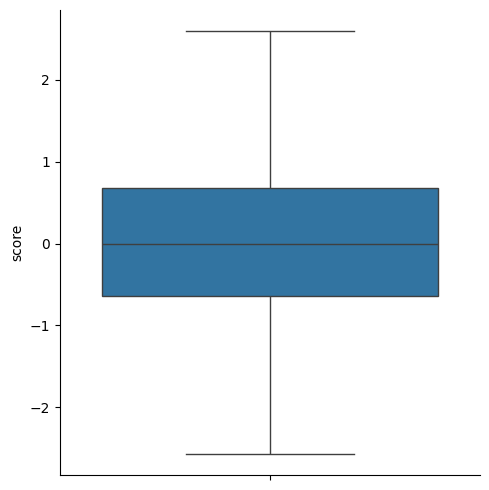

In [ ]:
#sns.boxplot(x=df['score'])
sns.catplot(data=df['score'], kind='box')

Agora, faça, em uma mesma figura, os *BoxPlots* para a variável `score` de acordo com a variável `type`. Isto é, um *BoxPlot* da variável `score` para cada valor de `type`. Novamente, use a biblioteca `seaborn`.

<Axes: xlabel='type', ylabel='score'>

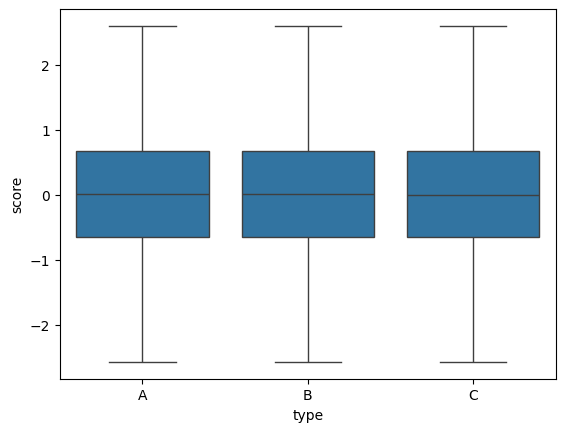

In [ ]:
sns.boxplot(x='type', y='score', data=df)

Com base **apenas** nos *BoxPlots*, o que é possível afirmar sobre a dispersão/distribuição dos dados das três variáveis? Você diria que as três distribuições são similares?

Para o primeiro gráfico, não possível concluir muita coisa, pois apresenta apenas os dados referentes a score, sem a separação dos tipos. Quanto ao segundo gráfico, a distribuição parece similar, visto que eles estão na mesma altura.


### Parte (c)

Agora:

1. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os histogramas.

2. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça as CDFs empíricas (vide Questão 1).

3. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os gráficos de Violino.



Text(0.5, 0.98, 'KDE')

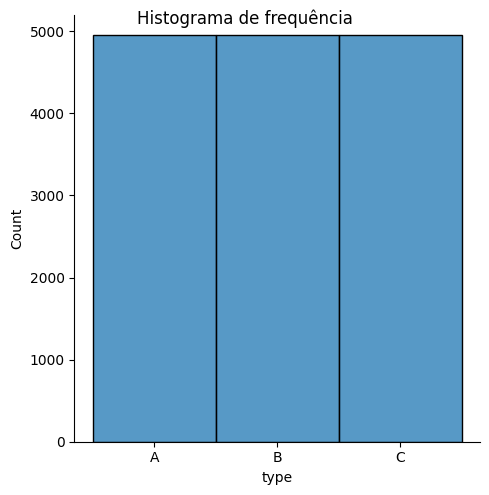

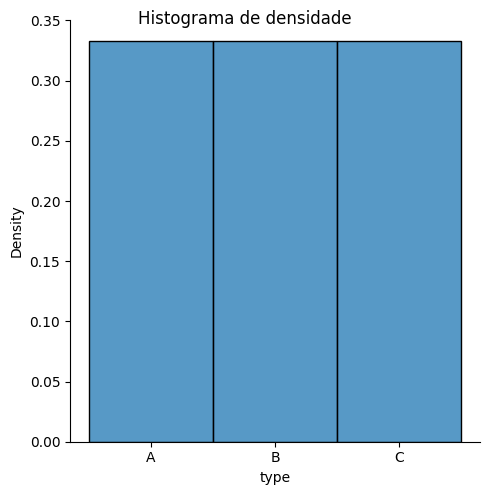

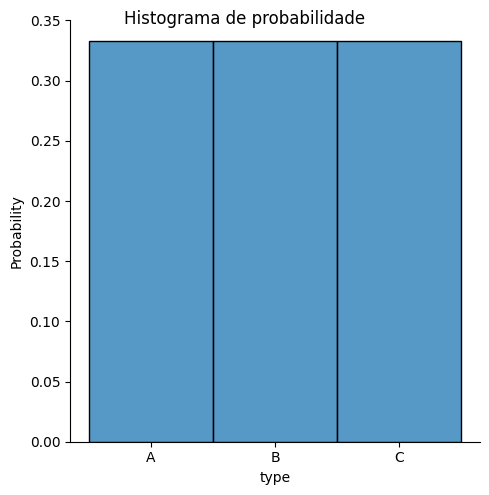

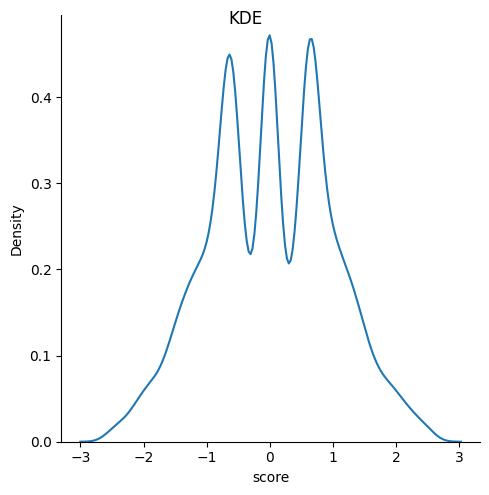

In [ ]:
# Histogramas
g1 = sns.displot(df, x='type')
g1.figure.suptitle('Histograma de frequência')

g2 = sns.displot(df, x='type', stat='density')
g2.figure.suptitle('Histograma de densidade')

g3 = sns.displot(df, x='type', stat="probability", discrete = True)
g3.figure.suptitle('Histograma de probabilidade')

g4 = sns.displot(df, x='score', kind="kde")
g4.figure.suptitle('KDE')

Text(0.5, 0.98, 'CDFs')

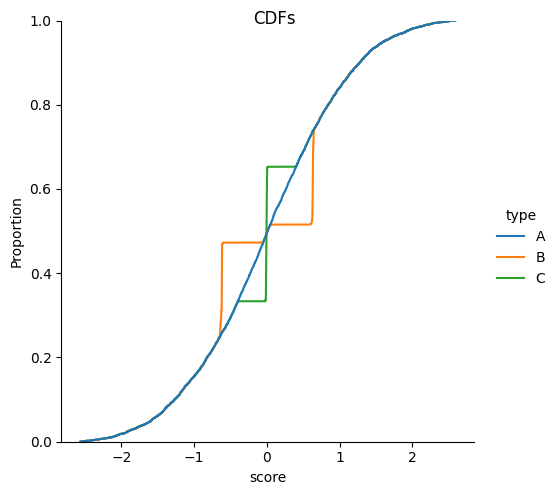

In [ ]:
#CDFs
g = sns.displot(x='score', hue='type', kind='ecdf', data=df)
g.figure.suptitle('CDFs')

Text(0.5, 0.98, 'Gráfico de Violino com split')

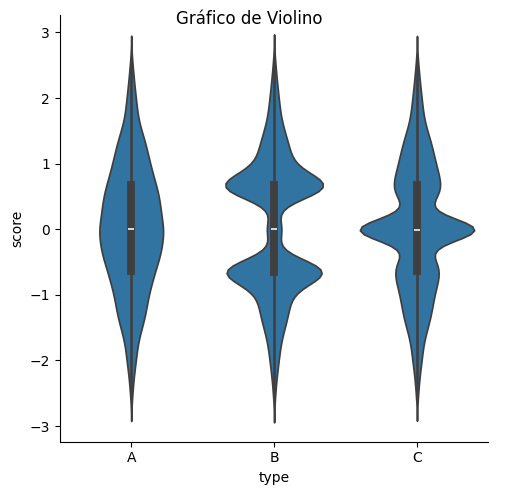

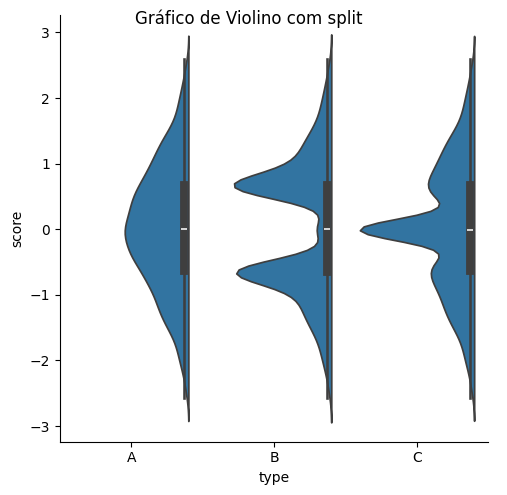

In [ ]:
# Gráficos de Violino
g1 = sns.catplot(x='type', y='score', kind='violin', data=df)
g1.figure.suptitle('Gráfico de Violino')

g2 = sns.catplot(x='type', y='score', kind='violin', split=True, data=df)
g2.figure.suptitle('Gráfico de Violino com split')

Revisitando a conclusão da Parte (b)...

Com base nessas novas figuras, o que é possível dizer sobre a dispersão/distribuição das três variáveis? Você diria que as três distribuições são similares?

Com base nas novas figuras, nota-se que em questão de quantidade os tipos A, B e C possuem quantidade semelhante de dados, mas quando olhamos para os valores, notamos que A possui uma variação mais homogênea, enquanto B e C aparentam se complementarem.

## Questão 5

Ainda no espírito das duas questões anteriores.

Leia o conjunto de dados, disponível no AVA, para a Questão 5 e carregue os dados em um `DataFrame` do `Pandas`. O arquivo contém um conjunto de pontos no plano, ou seja, uma coleção de pares ($x$, $y$).

Na verdade, o arquivo é uma coleção de vários conjuntos de dados. O arquivo possui três colunas:
- `dataset` indica a qual conjunto de dados um ponto pertence
- `x` indica a coordenada $x$ de cada ponto do conjunto
- `y` indica a coordenada $y$ de cada ponto do conjunto



In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('dados_questao_5.csv')
df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


### Parte (a)

Para cada um dos 13 conjuntos de dados disponível no arquivo, calule e imprima:
1. A média dos valores das colunas `x` e `y`
2. O desvio padrão dos valores das colunas `x` e `y`
3. A correlação linear entre as colunas `x` e `y`

Com base nos valores observados, formule uma hipótese sobre o grau de similaridade entre os diversos conjuntos de dados. Em outras palavras, vocês diriam que eles são similares ou diferentes?

**Observação:** tente modularizar seu código e utilizar os recursos do `Pandas`, por exemplo, `groupby`.

In [ ]:
dfg = df.groupby("dataset")
df_mean = dfg.mean()
df_std = dfg.std()
df_corr = dfg.corr()
print(df_mean)
print(df_std)
print(df_corr)

                    x          y
dataset                         
away        54.266100  47.834721
bullseye    54.268730  47.830823
circle      54.267320  47.837717
dino        54.263273  47.832253
dots        54.260303  47.839829
h_lines     54.261442  47.830252
high_lines  54.268805  47.835450
slant_down  54.267849  47.835896
slant_up    54.265882  47.831496
star        54.267341  47.839545
v_lines     54.269927  47.836988
wide_lines  54.266916  47.831602
x_shape     54.260150  47.839717
                    x          y
dataset                         
away        16.769825  26.939743
bullseye    16.769239  26.935727
circle      16.760013  26.930036
dino        16.765142  26.935403
dots        16.767735  26.930192
h_lines     16.765898  26.939876
high_lines  16.766704  26.939998
slant_down  16.766759  26.936105
slant_up    16.768853  26.938608
star        16.768959  26.930275
v_lines     16.769959  26.937684
wide_lines  16.770000  26.937902
x_shape     16.769958  26.930002
          

### Resposta parte (a)

Olhando apenas para os valores acima, a hipótese inicial é de que estes datasets têm valores parecidos e são pelo menos um pouco similares, pois se formos comparar as médias, desvio padrão e correlação os valores são extremamente próximos.

### Parte (b)

Agora, vamos testar a hipótese estabelecida no item anterior. Faça um gráfico, para cada um dos 13 conjuntos de dados, marcando os pontos de cada conjunto no plano.

Com base nos gráficos, o que pode ser dito sobre o grau de similaridade entre os diversos conjuntos de dados? Em outras palavras, vocês diriam que eles são similares ou diferentes?

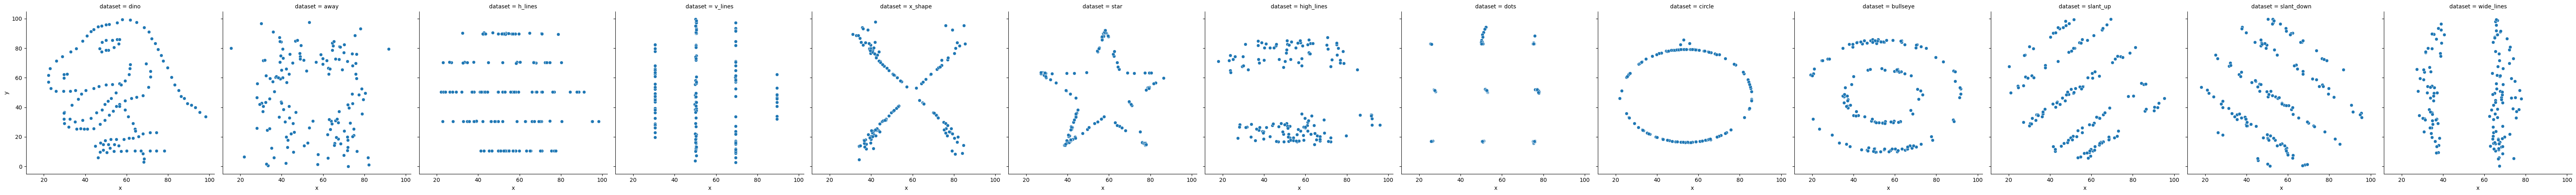

In [ ]:
sns.relplot(x = "x", y = "y", col= "dataset", data=df)

### Resposta parte (b)

Após plotar os gráficos e analisar os diferentes datasets, é possível dizer que os datasets são, no geral, bastante diferentes entre si.

## Referências (Spoiler Alert!)

Os dados de algumas questões foram obtidos em https://www.research.autodesk.com/publications/same-stats-different-graphs/. Para não estragar a surpresa, sugiro consultar essa referência apenas após tentar resolver as questões. De toda forma, as respostas das perguntas não estão contidas na página citada.